# Example: Downloading datasets from the Climate Data Store with the `cdsapi`

```{note}
The online laboratory has only been tested in recent Firefox and Chrome browsers. Some features may not (yet) be supported in Safari browsers.
```

```{caution}
In the online laboratory, changes to notebooks and local files are only saved in your web browser's storage and not persisted to disk.

Please download copies of any files that you don't want to loose.

Your files from an old session will usually be kept if you close or refresh this page, unless your browser's storage for `lab.climet.eu` is cleared, e.g.
- manually by clearing the browser's site data
- automatically when too much data is stored
- automatically when you close a private browsing context
- if you have setup your browser to clear site data, e.g. when the browser is closed
```

## The Climate Data Store

The Climate Data Store (CDS) provides free open access to information about the past, present and future climate, including observations, historical records, reanalyses, forecasts, and projections. The CDS can be accessed online at <https://cds.climate.copernicus.eu/> or programmatically using the `cdsapi` Python package.

## Installing and configuring the `cdsapi` package

To run this example, you need a CDS account and your API key (personal access token), which is available from <https://cds.climate.copernicus.eu/how-to-api>.

Please enter your API key to configure the `cdsapi.Client` in the next cell.

Please remember that you must keep your API key private and should not share a notebook that contains your personal API key.

In [1]:
import cdsapi

client = cdsapi.Client(
    url="https://cds.climate.copernicus.eu/api",
    key="<CDS-API-KEY>",
)

[pyodide]: Loaded attrs, cdsapi, datapi, multiurl, python-dateutil, pytz, six, tqdm, typing_extensions


/lib/python3.12/site-packages/datapi/api_client.py:83: UserWarning: Expecting value: line 1 column 1 (char 0)
  warnings.warn(str(exc), UserWarning)


## Retrieving the dataset

You can now retrieve the following example NetCDF dataset.

```{tip}
Retrieving a dataset from the Climate Data Store may take a long time to process, ranging from minutes to hours, as data requests are served on the fly using a queueing system. If you intend to reuse a dataset several times, consider downloading it to your local machine instead of fetching it from the CDS every time.
```

Once the download has completed, you should have a new `03-t2m.nc` file in the `data/` subdirectory.

In [2]:
from pathlib import Path

req = client.retrieve(
    "reanalysis-era5-single-levels",
    {
        "variable": "2t",
        "product_type": "reanalysis",
        "date": "2012-12-01",
        "time": "14:00",
        "format": "netcdf",
    },
)

data_path = req.download(Path("data") / "03-t2m.nc")

2025-02-17 12:35:44,612 INFO Request ID is 706d4643-1d6a-47d8-b80a-daeeca992020
2025-02-17 12:35:45,028 INFO status has been updated to accepted
2025-02-17 12:35:47,730 INFO status has been updated to running
2025-02-17 12:35:53,552 INFO status has been updated to successful
[CORS]: The origin https://object-store.os-api.cci2.ecmwf.int does not support Cross-Origin Resource Sharing.
        Requests to this origin are being proxied, which may reduce performance.

        Please ask the maintainers of https://object-store.os-api.cci2.ecmwf.int to enable CORS using the
        Access-Control-Allow-Origin header.

        Please see https://developer.mozilla.org/en-US/docs/Web/HTTP/CORS for
        more information about Cross-Origin Resource Sharing.


[pyodide]: Loading ipywidgets, jupyterlab_widgets, widgetsnbextension
[pyodide]: Loaded ipywidgets, jupyterlab_widgets, widgetsnbextension


/lib/python3.12/site-packages/multiurl/base.py:49: TqdmMonitorWarning: tqdm:disabling monitor support (monitor_interval = 0) due to:
can't start new thread
  return tqdm(
                                                                                         

In [3]:
import netCDF4
import xarray as xr

ds = xr.open_dataset(data_path)
ds

[pyodide]: Loading cftime, netCDF4, numpy, pandas, tzdata, xarray
[pyodide]: Loaded cftime, netCDF4, numpy, pandas, tzdata, xarray
[pyodide]: Loading pyarrow, pyodide-unix-timezones
[pyodide]: Loaded pyarrow, pyodide-unix-timezones
[pyodide]: Loading cloudpickle
[pyodide]: Loaded cloudpickle
[pyodide]: Loading PyYAML, click, dask, fsspec, locket, partd, toolz
[pyodide]: Loaded PyYAML, click, dask, fsspec, locket, partd, toolz
[pyodide]: Loading h5netcdf, h5py
[pyodide]: Loaded h5netcdf, h5py
[pyodide]: Loading scipy
[pyodide]: Loaded scipy
[pyodide]: Loading asciitree, numcodecs, zarr
[pyodide]: Loaded asciitree, numcodecs, zarr
[pyodide]: Loading Pint, flexcache, flexparser, platformdirs
[pyodide]: Loaded Pint, flexcache, flexparser, platformdirs
[pyodide]: Loading future, uncertainties
[pyodide]: Loaded future, uncertainties
[pyodide]: Loading Jinja2, MarkupSafe
[pyodide]: Loaded Jinja2, MarkupSafe


<xarray.Dataset> Size: 4MB
Dimensions:     (valid_time: 1, latitude: 721, longitude: 1440)
Coordinates:
    number      int64 8B ...
  * valid_time  (valid_time) datetime64[ns] 8B 2012-12-01T14:00:00
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    expver      <U4 16B ...
Data variables:
    t2m         (valid_time, latitude, longitude) float32 4MB ...
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2025-01-31T14:57 GRIB to CDM+CF via cfgrib-0.9.1...

[pyodide]: Memory usage has grown to 149.1MiB (from 49.9MiB) for this notebook
[pyodide]: Loaded 102 new dynamic libraries (108 total for this notebook)


## Plotting the dataset

In [4]:
import earthkit
import earthkit.plots.quickmap

[pyodide]: Loading Cartopy, Markdown, adjustText, affine, array_api_compat, cffi, cfgrib, click-plugins, cligj, contourpy, cycler, earthkit, earthkit-data, earthkit-geo, earthkit-meteo, earthkit-plots, earthkit-plots-default-styles, earthkit-regrid, earthkit-time, earthkit-transforms, eccodes, entrypoints, filelock, findlibs, fonttools, geopandas, jsonschema, jsonschema-specifications, kiwisolver, lru-dict, matplotlib, matplotlib-pyodide, pdbufr, pillow, plotly, pycparser, pyogrio, pyparsing, pyproj, pyshp, rasterio, referencing, rpds-py, shapely, tenacity
[pyodide]: Loaded Cartopy, Markdown, adjustText, affine, array_api_compat, cffi, cfgrib, click-plugins, cligj, contourpy, cycler, earthkit, earthkit-data, earthkit-geo, earthkit-meteo, earthkit-plots, earthkit-plots-default-styles, earthkit-regrid, earthkit-time, earthkit-transforms, eccodes, entrypoints, filelock, findlibs, fonttools, geopandas, jsonschema, jsonschema-specifications, kiwisolver, lru-dict, matplotlib, matplotlib-pyod

Matplotlib is building the font cache; this may take a moment.


[pyodide]: Loading fiona
[pyodide]: Loaded fiona


/lib/python3.12/site-packages/earthkit/regrid/utils/caching.py:27: UserWarning: only soft file lock is available
  from filelock import FileLock


[pyodide]: Memory usage has grown to 257.8MiB (from 149.1MiB) for this notebook
[pyodide]: Loaded 60 new dynamic libraries (168 total for this notebook)


We finally plot the loaded dataset. `earthkit` provides the

```python
earthkit.plots.quickmap.plot(
    data, units=None, style=None, **kwargs,
) -> earthkit.plots.components.maps.Map
```

helper function to plot weather and climate maps data.

In this example, we plot the 2 metre temperature variable `t2m` from the dataset.

In [5]:
da = ds["t2m"]

/lib/python3.12/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


[pyodide]: Memory usage has grown to 534.6MiB (from 257.8MiB) for this notebook
[pyodide]: Loaded 1 new dynamic library (169 total for this notebook)


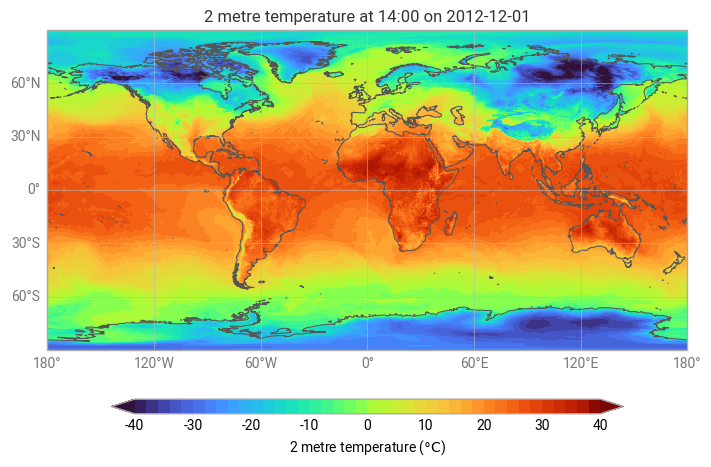

In [6]:
earthkit.plots.quickmap.plot(da.rename(dict(valid_time="time")), units="degC");